In [ ]:
# @ ElsaTH

In [4]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
import requests
import json

In [3]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url, date_parser="date")
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37189,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37190,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37191,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37192,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data2 = data.loc[:,["location","date","new_cases"]]
data2

,location,date,new_cases
0,Afghanistan,2019-12-31,0.0
1,Afghanistan,2020-01-01,0.0
2,Afghanistan,2020-01-02,0.0
3,Afghanistan,2020-01-03,0.0
4,Afghanistan,2020-01-04,0.0
...,...,...,...
37189,International,2020-02-28,0.0
37190,International,2020-02-29,0.0
37191,International,2020-03-01,0.0
37192,International,2020-03-02,0.0


In [6]:
data2.set_index(["location"],inplace=True)


In [7]:
data2 = data2.loc[["Spain"],:].dropna()
data2

,date,new_cases
location,,
Spain,2019-12-31,0.0
Spain,2020-01-01,0.0
Spain,2020-01-02,0.0
Spain,2020-01-03,0.0
Spain,2020-01-04,0.0
...,...,...
Spain,2020-08-11,3632.0
Spain,2020-08-12,3172.0
Spain,2020-08-13,7550.0


In [8]:
data2.reset_index(inplace=True)
data2

,location,date,new_cases
0,Spain,2019-12-31,0.0
1,Spain,2020-01-01,0.0
2,Spain,2020-01-02,0.0
3,Spain,2020-01-03,0.0
4,Spain,2020-01-04,0.0
...,...,...,...
224,Spain,2020-08-11,3632.0
225,Spain,2020-08-12,3172.0
226,Spain,2020-08-13,7550.0
227,Spain,2020-08-14,5479.0


In [11]:
data2

,location,date,new_cases
0,Spain,2019-12-31,0.0
1,Spain,2020-01-01,0.0
2,Spain,2020-01-02,0.0
3,Spain,2020-01-03,0.0
4,Spain,2020-01-04,0.0
...,...,...,...
224,Spain,2020-08-11,3632.0
225,Spain,2020-08-12,3172.0
226,Spain,2020-08-13,7550.0
227,Spain,2020-08-14,5479.0


In [9]:
data2.set_index("date", inplace=True)

In [13]:
data2

,location,new_cases
date,,
2019-12-31,Spain,0.0
2020-01-01,Spain,0.0
2020-01-02,Spain,0.0
2020-01-03,Spain,0.0
2020-01-04,Spain,0.0
...,...,...
2020-08-11,Spain,3632.0
2020-08-12,Spain,3172.0
2020-08-13,Spain,7550.0


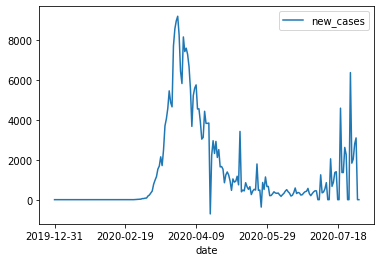

In [106]:
data2.plot()

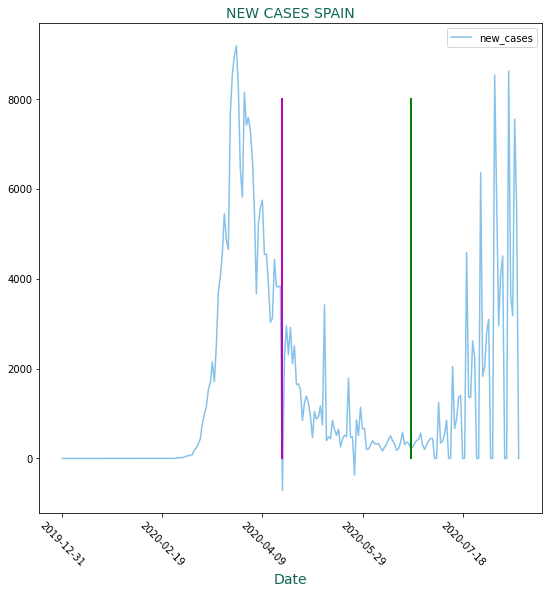

In [10]:
data2.plot(figsize=(9,9), rot=-45, color="#85C1E9")
plt.xlabel("Date", size=14, color="#0E6655")
plt.plot([174,174],[0,8000],'k-', lw=2, color="g")
plt.plot([110,110],[0,8000],'k-', lw=2, color="m")
plt.title("NEW CASES SPAIN",size=14, color="#0E6655")
plt.savefig('new_cases_spain.png')


In [ ]:
Observamos outliers

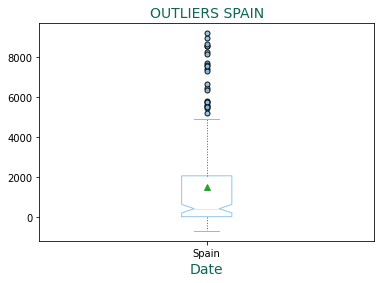

In [11]:
plt.boxplot(data2.new_cases,
            notch=True, patch_artist=None,
            capprops=dict(color="#85C1E9",markerfacecolor='g'),
            medianprops=dict(color="orange", alpha=0.3),
            whiskerprops=dict(color="green",alpha=0.9, markersize=17,linestyle = 'dotted'),
            flierprops=dict(color="green",alpha=0.9, markersize=5,markerfacecolor="#85C1E9", marker='o'),
            boxprops=dict(color="#85C1E9",alpha=0.9, markersize=5),
            showmeans=dict(color="green",alpha=0.9, markersize=5),
            showfliers=dict(color="green",alpha=0.9, markersize=5),
            showbox=dict(color="green",alpha=0.9, markersize=5),
            showcaps=dict(color="green",alpha=0.9, markersize=5)
          )

            
plt.title("OUTLIERS SPAIN",size=14, color="#0E6655")
plt.xticks([1], ['Spain'])
plt.xlabel("Date", size=14, color="#0E6655")
plt.savefig('outliers_spain.png')
plt.show()

In [ ]:
Se observa que existen outliers de días que se han registrado más datos de lo normal, pero no hay datos que no puedan corresponder a la realidad de la situación debido a incremento en los nuevos casos.